<a href="https://colab.research.google.com/github/TMhdSofyan/Unsupervised_Learning/blob/main/Unsupervised_Learning_Clustering_RockTyping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/"

'01. Bank Soal Smart Competition'   Geothermal
 01_Project_Reservoir_Description   I-COSINE
'01. Reservoir Description'	    IMG_20230218_160144.jpg
 Administrasi			    KAUST
'Artikel bareng Mas Fiki'	    KP
'Bank Soal SPE.rar'		   'Kumpulan Soal per Topik.xlsx'
'Bank Soal Super.pdf'		   'My Document'
 Cementing			   'Paper Join Mas Fiki'
 Classroom			   'Persiapan Keberangkatan KFUPM'
'Colab Notebooks'		   'PETROBOWL 2004 Full Question-1.xlsx'
'Data Science_Dashboar Project'    'PetroBowl - Quizlet.pdf'
 EnergyHarvest			   'PETROBOWL SMART COMP PREPARATION.docx'
 Engman				    TA


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/Dataset.csv', index_col=0, sep = ';')
df.head()

,porosity,permeability
index,,
1,0.073,0.0260
2,0.091,0.0545
3,0.073,0.0300
4,0.105,0.1080
5,0.091,0.0704


In [ ]:
df['permeability'] = np.log(df['permeability'].values).reshape(-1,1)

<ipython-input-15-5090d7f1c3b8>:1: RuntimeWarning: invalid value encountered in log
  df['permeability'] = np.log(df['permeability'].values).reshape(-1,1)


In [ ]:
df.head()

,porosity,permeability
index,,
1,0.073,0.258228
2,0.091,0.065788
3,0.073,0.226845
4,0.105,-0.223097
5,0.091,-0.024392


In [ ]:
!pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.head()

,porosity,permeability
index,,
1,0.073,0.258228
2,0.091,0.065788
3,0.073,0.226845
4,0.105,-0.223097
5,0.091,-0.024392


ValueError: ignored

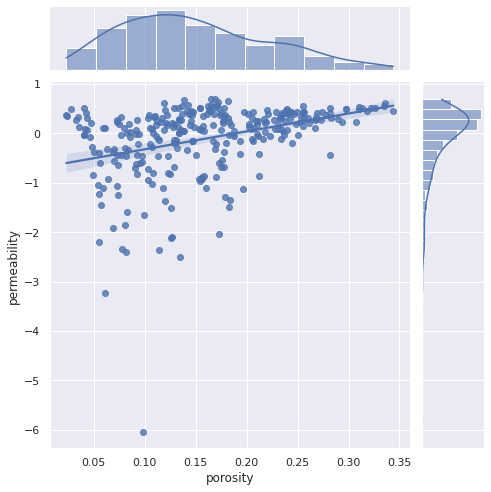

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# create a scatter plot with regression line and score
sns.set(style='darkgrid')
g = sns.jointplot(x='porosity', y='permeability', data=df, kind='reg', height=7)
linreg = LinearRegression()
linreg.fit(df[['porosity']], df[['permeability']])
slope = linreg.coef_[0]
intercept = linreg.intercept_
score = linreg.score(df[['porosity']], df[['permeability']])
text = f"R² = {score:.2f}"
plt.annotate(text, xy=(0.05, 0.95), xycoords=g.ax_joint.transAxes)
plt.plot(df['porosity'], slope*df['porosity']+intercept, color='r')
plt.show()


**Clustering Using DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

DBSCAN Fitting 

In [ ]:
dbscan = DBSCAN(eps=0.5)
dbscan.fit(df)

DBSCAN()

Get the Label

In [ ]:
labels = dbscan.labels_

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

Number of clusters: 4


In [ ]:
for i in range(n_clusters):
    cluster_i = df[labels == i]
    print(f"Indices of points in cluster {i}: {cluster_i.index.tolist()}")

Indices of points in cluster 0: [1, 3, 29, 42, 69, 122, 125]
Indices of points in cluster 1: [2, 5, 6, 8, 13, 19, 65, 72, 82, 112, 116]
Indices of points in cluster 2: [4, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 117, 118, 119, 120, 121, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 2

In [ ]:
df['cluster'] = dbscan.labels_

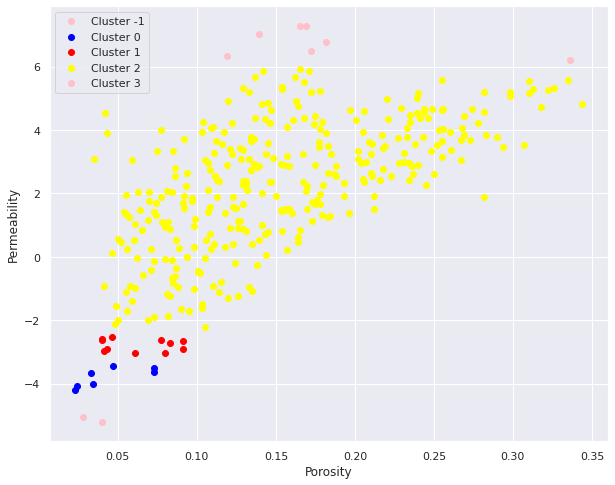

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'red', 'yellow', 'pink']

for i, cluster in df.groupby('cluster'):
    ax.scatter(cluster['porosity'], cluster['permeability'], color=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Porosity')
ax.set_ylabel('Permeability')
ax.legend()

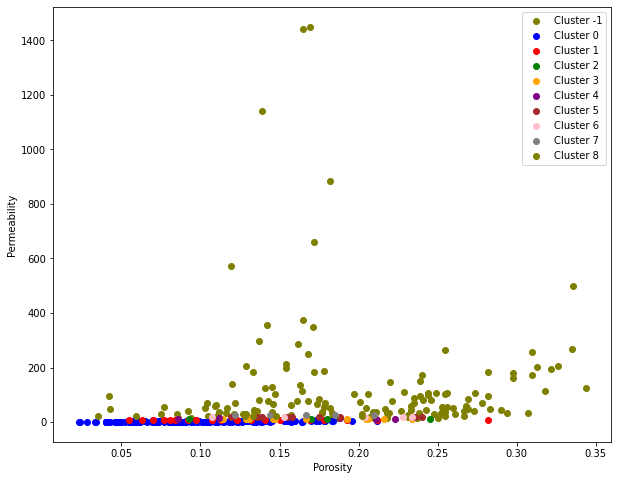

In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans

  0%|          | 0/18 [00:00<?, ?it/s]

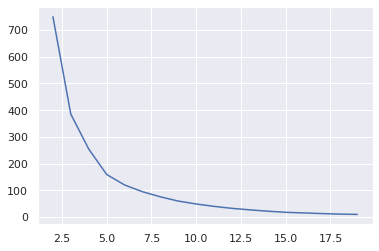

In [ ]:
score = []
for k in tqdm(range(2, 20)):
  model = KMeans(n_clusters = k)
  member = model.fit_predict(df)
  score.append(model.inertia_)

plt.plot(range(2, 20), score)

In [ ]:
model = KMeans(n_clusters =5)
member = model.fit_predict(df)

In [ ]:
df_pred = df.copy()
df_pred['cluster'] = member
df_pred.head()

,porosity,permeability,cluster
index,,,
1,0.073,-3.649659,3
2,0.091,-2.909555,3
3,0.073,-3.506558,3
4,0.105,-2.225624,0
5,0.091,-2.653562,3


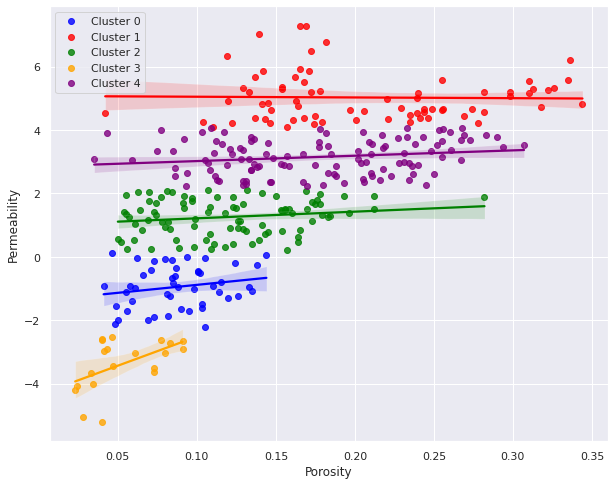

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, cluster in df_pred.groupby('cluster'):
    sns.regplot(x=cluster['porosity'], y=cluster['permeability'], color=colors[i], label=f'Cluster {i}', ax=ax)

ax.set_xlabel('Porosity')
ax.set_ylabel('Permeability')
ax.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/01_Project_Reservoir_Description/Figures/kmeans_clustering.png', dpi=300)

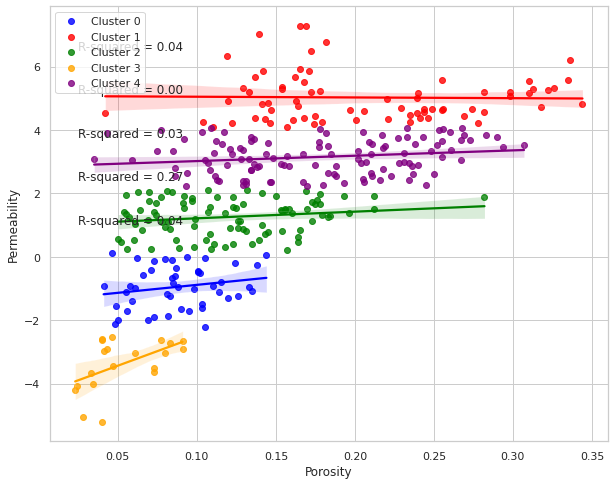

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, cluster in df_pred.groupby('cluster'):
    sns.regplot(x=cluster['porosity'], y=cluster['permeability'], color=colors[i], label=f'Cluster {i}', ax=ax)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=cluster['porosity'], y=cluster['permeability'])
    ax.text(0.05, 0.9-i*0.1, f"R-squared = {r_value**2:.2f}", transform=ax.transAxes)

ax.set_xlabel('Porosity')
ax.set_ylabel('Permeability')
ax.legend()
plt.show()
